In [324]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random

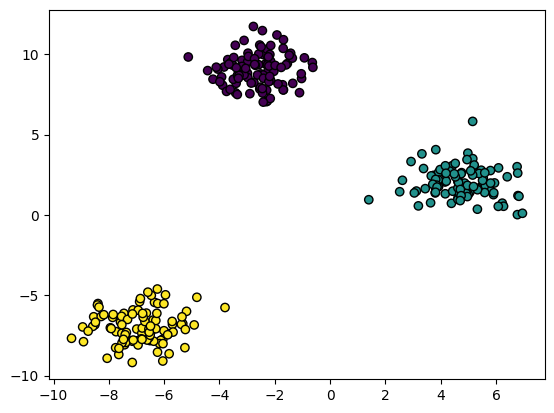

In [343]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate Data (3 Clusters)
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors="k")

In [344]:
print(X)

[[-7.33898809 -7.72995396]
 [-7.74004056 -7.26466514]
 [-1.68665271  7.79344248]
 [ 4.42219763  3.07194654]
 [-8.91775173 -7.8881959 ]
 [ 5.49753846  1.81323115]
 [-2.3360167   9.39960351]
 [ 5.05281029  1.40944513]
 [-2.98837186  8.82862715]
 [-3.70050112  9.67083974]
 [-3.11090424 10.86656431]
 [ 4.99689432  1.28026009]
 [-2.30033403  7.054616  ]
 [-3.92456837  8.59364081]
 [-7.53026976 -7.36723498]
 [-3.21125072  8.68662398]
 [-8.50716963 -6.83202465]
 [ 2.61473625  2.159624  ]
 [-2.41212007  9.98293112]
 [-1.92234053 11.20474175]
 [-1.35060204  8.19360381]
 [-2.67048333  9.41833699]
 [ 5.61499857  1.8261123 ]
 [-6.99195524 -7.10107919]
 [-2.97261532  8.54855637]
 [-6.34982301 -5.43854097]
 [-7.45639852 -6.12471837]
 [ 3.82165815  4.06555696]
 [ 4.62763206  1.07591531]
 [-3.39871205  8.19847584]
 [-3.49973395  8.4479884 ]
 [-3.58009012  9.49675854]
 [-6.04929137 -7.73619342]
 [-2.29510388  7.76854735]
 [-8.39481825 -5.51323533]
 [-2.28173769 10.32142888]
 [-6.12263857 -7.80227492]
 

In [345]:
# reducing features to useful features only
class PCA:
    def __init__(self, n):
        self.n = n
        self.mean = None
        self.components = None
        
    def fit(self, vec):
        self.mean = np.mean(vec, axis = 0)
        vec -= self.mean

        cov = np.cov(vec.T)

        eigenvectors, eigenvalues = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T

        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n]
        
        

    def transform(self, vec):
        vec -= self.mean
        return np.dot(vec, self.components.T)

In [346]:
pca = PCA(2)
pca.fit(X)
a = pca.transform(X)
a

array([[-392.70636881, -603.69190626],
       [-405.05752538, -586.95756463],
       [ 164.05992209,  284.47348992],
       [ 393.19566574,  150.00424248],
       [-475.81432886, -639.10898328],
       [ 426.11975479,  104.56754191],
       [ 158.84143332,  354.97927917],
       [ 396.483188  ,   76.30551738],
       [ 115.73820067,  314.60816051],
       [  94.0845361 ,  345.13809539],
       [ 144.82077799,  416.22373774],
       [ 391.39790346,   68.76038527],
       [ 120.01629418,  236.22838936],
       [  64.00942189,  286.42096632],
       [-396.1570085 , -588.54319576],
       [ 101.93167828,  303.51686091],
       [-436.60929255, -578.22971471],
       [ 285.37692021,   72.23780955],
       [ 165.07725297,  383.35403991],
       [ 211.18449359,  454.03760997],
       [ 188.10154567,  310.66748767],
       [ 142.14040782,  350.13616858],
       [ 432.322194  ,  107.25897312],
       [-364.14182138, -565.66513795],
       [ 111.68629971,  300.62450964],
       [-302.6408616 , -4

In [347]:
def get_squared_dis(x1, y1, x2, y2):
    return (x1 - x2)**2 + (y1 - y2)**2

In [348]:
def compute_init_centroids(K, matrix):
    random_idx = np.random.permutation(matrix.shape[0])
    
    centroids = matrix[random_idx[:K]]
    
    return centroids
    

In [349]:
def get_cluster_index(centroids, matrix, K):
    m ,n = matrix.shape
    cluster_index = np.zeros(m)

    for i in range(m):

        d = get_squared_dis(matrix[i][0], matrix[i][1], centroids[0][0], centroids[0][1])
        ans = 0
        for j in range(1, K):
            new_d = get_squared_dis(matrix[i][0], matrix[i][1], centroids[j][0], centroids[j][1])
            if(new_d < d):
                d = new_d
                ans = j

        cluster_index[i] = ans

    return cluster_index
                
            

In [350]:
def compute_centroids(cluster_index, matrix, centroids, k):
    m, n = matrix.shape
    new_centroids = []

    for i in range(k):

        x_m, y_m = 0, 0
        n = 0
        for j in range(m):
            if cluster_index[j] == i:
                x_m += matrix[j][0]
                y_m += matrix[j][1]
                n += 1

        if n != 0:
            x_m /= n
            y_m /= n

        new_centroids.append([x_m ,y_m])

    return np.array(new_centroids)

In [351]:
def run_KMeans(matrix, K, iterations):
    m, n = matrix.shape
    centroids = compute_init_centroids(K, matrix)

    for i in range(iterations):

        cluster_index = get_cluster_index(centroids, matrix, K)

        centroids = compute_centroids(cluster_index, matrix, centroids, K)

    return cluster_index, centroids

In [352]:
def cal_cohesion(arr, j):

    d = 0
    
    for i in range(len(arr)):
        if i != j:
            d += get_squared_dis(arr[i][0], arr[i][1], arr[j][0], arr[j][1])

    if len(arr) - 1:
        return d/(len(arr) - 1)

    return 0

In [353]:
def cal_separation(cluster_index, matrix, k_val, K, x, y):
    m, n = matrix.shape

    least_dis = np.inf
    
    for i in range(K):
        if i != k_val:
            d, c = 0, 0
            for j in range(m):
                if cluster_index[j] == i:
                    d += get_squared_dis(x, y, matrix[j][0], matrix[j][1])
                    c += 1
            if c :
                d /= c
            if d < least_dis:
                least_dis = d

    return least_dis
    

In [369]:
def cal_shilloute_dis(cluster_index, centroids, matrix, K):
    m, n = matrix.shape

    si_scores = np.zeros(K)

    for i in range(m):

        point = matrix[i]

        # calculating cohesion <intra cluster distance>
        arr = []
        for j in range(m):
            if cluster_index[j] == cluster_index[i] and i != j:
                arr.append(matrix[j])

        if len(arr) > 1:
            a_i = np.mean([get_squared_dis(point[0], point[1], other[0], other[1]) for other in arr if not np.array_equal(point, other)])
        else:
            a_i = 0


        # calculating separation <mean distance from nearest cluster>
        b_i = np.inf

        for j in range(K):
            if j == cluster_index[i]:
                continue

            arr = []
            for k in range(m):
                if cluster_index[k] == j:
                    arr.append(matrix[k])

            b_i = min(b_i, np.mean([get_squared_dis(point[0], point[1], other[0], other[1]) for other in arr]))

        # computer score
        if max(a_i, b_i) > 0 :
            si_scores =  (b_i - a_i) / max(a_i, b_i)


    return np.mean(si_scores)
        

In [370]:
def apply_clustering(matrix):
    best, K = -1, 1
    best_cluster_index, best_centroids = None, None
    
    for i in range(2, 10):
        cluster_index, centroids = run_KMeans(matrix, i, 20)
        score = cal_shilloute_dis(cluster_index, centroids, matrix, i)
        
        if score > best:
            best = score
            K = i
            best_cluster_index = cluster_index
            best_centroids = centroids
    
    return best, K, best_cluster_index, best_centroids

In [371]:
best, K, cluster_index, centroids = apply_clustering(a)
best, K, cluster_index, centroids

(np.float64(0.9762078155543257),
 2,
 array([0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
        1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
        0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
        0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
        1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
        1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0.,

In [372]:
COLOR_MAP = {}
for i in range(K):
    COLOR_MAP[i] = (random.random(), random.random(), random.random())
def get_color_for_plot(i, K):
    return COLOR_MAP[i]

In [373]:
def make_graph(K, cluster_index, centroids, matrix):

    m, n = matrix.shape

    # plotting data points
    for i in range(m):
        color = get_color_for_plot(cluster_index[i], K)
        plt.scatter(matrix[i][0], matrix[i][1], marker = "o", color = color, s=50, edgecolors="black")

    # plotting centroids
    for i in range(K):
        color = get_color_for_plot(i, K)
        plt.scatter(centroids[i][0], centroids[i][1], marker = "o", color = color, s = 200, edgecolors = "black")

    plt.title("Scatter Plot")

KeyError: np.float64(2.0)

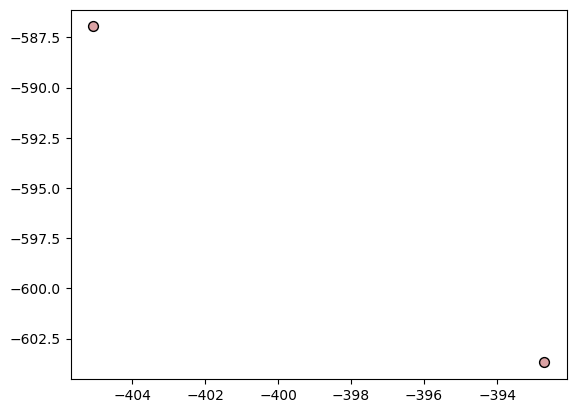

In [378]:
cluster_index, centroids = run_KMeans(a, 3, 20)
make_graph(3, cluster_index, centroids, a)

In [363]:
from sklearn.metrics import silhouette_score
silhouette_score(a, cluster_index)

np.float64(0.8206949263998377)